In [37]:
import pandas as pd
import numpy as np
import pylab as plt
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

In [38]:
df = pd.read_csv('winequality-red.csv', sep=';')

In [39]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [41]:
len(df['quality'].value_counts())

6

In [42]:
df['q_bins'] = df['quality'].apply(lambda x: 1 if x < 5 
                                                else 2 if x > 4 and x < 7
                                                else 3)

In [43]:
df['q_bins'].value_counts()

2    1319
3     217
1      63
Name: q_bins, dtype: int64

In [44]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [45]:
df.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,q_bins
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,2
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,2
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,2
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,3
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,3
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,2


In [46]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,q_bins
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,2.096310
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.407354
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,1.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,2.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,2.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,2.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,3.000000


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>,
        <AxesSubplot:title={'center':'residual sugar'}>],
       [<AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>,
        <AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>],
       [<AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>],
       [<AxesSubplot:title={'center':'q_bins'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

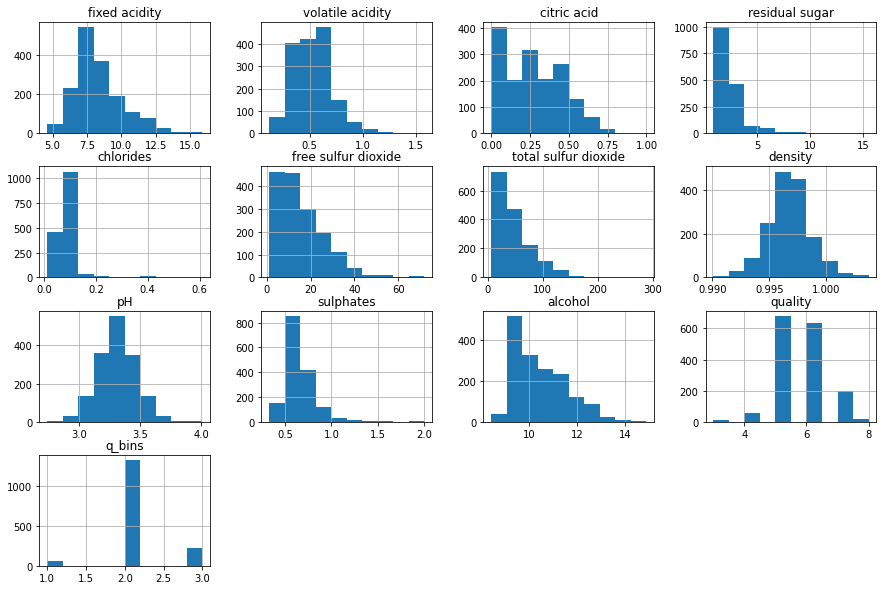

In [47]:
df.hist(figsize=(15, 10))

In [48]:
X = df.drop(['q_bins'], axis=1)

In [49]:
y = df['q_bins']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [51]:
error = []
for i in range(2, 15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'avgerror')

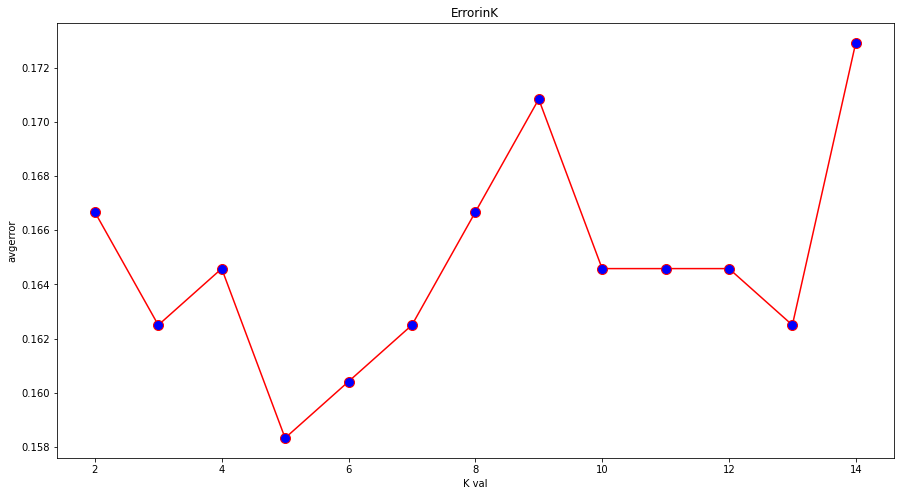

In [52]:
plt.figure(figsize=(15,8))
plt.plot(range(2, 15), error, 
        color='red',marker='o', markerfacecolor='blue', markersize=10 )
plt.title('ErrorinK')
plt.xlabel('K val')
plt.ylabel('avgerror')

In [53]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

KNeighborsClassifier()

In [54]:
y_pred = neigh.predict(X_test)

In [55]:
accuracy_score(y_test, y_pred)

0.8416666666666667

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.80      0.21      0.33        19
           2       0.86      0.96      0.91       392
           3       0.62      0.35      0.44        69

    accuracy                           0.84       480
   macro avg       0.76      0.51      0.56       480
weighted avg       0.82      0.84      0.82       480



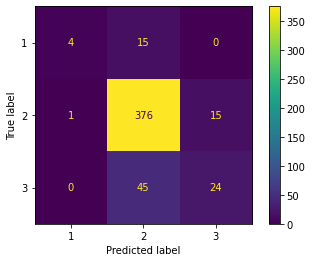

In [57]:
plot_confusion_matrix(neigh,X_test,y_test)

# It 2

In [58]:
X_train_it2, X_test_it2, y_train_it2, y_test_it2 = train_test_split(X, y, test_size = 0.3, random_state=40)

In [59]:
neigh = KNeighborsClassifier()

In [60]:
smote = SMOTE()

In [61]:
X_train_it2, y_train_it2 = smote.fit_resample(X_train_it2, y_train_it2)
y_train_it2.value_counts()

2    927
1    927
3    927
Name: q_bins, dtype: int64

In [62]:
X_train_it2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2781 entries, 0 to 2780
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         2781 non-null   float64
 1   volatile acidity      2781 non-null   float64
 2   citric acid           2781 non-null   float64
 3   residual sugar        2781 non-null   float64
 4   chlorides             2781 non-null   float64
 5   free sulfur dioxide   2781 non-null   float64
 6   total sulfur dioxide  2781 non-null   float64
 7   density               2781 non-null   float64
 8   pH                    2781 non-null   float64
 9   sulphates             2781 non-null   float64
 10  alcohol               2781 non-null   float64
 11  quality               2781 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 260.8 KB


In [63]:
error = []
for i in range(2, 15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_it2, y_train_it2)
    pred_i = knn.predict(X_test_it2)
    error.append(np.mean(pred_i != y_test_it2))

Text(0, 0.5, 'avgerror')

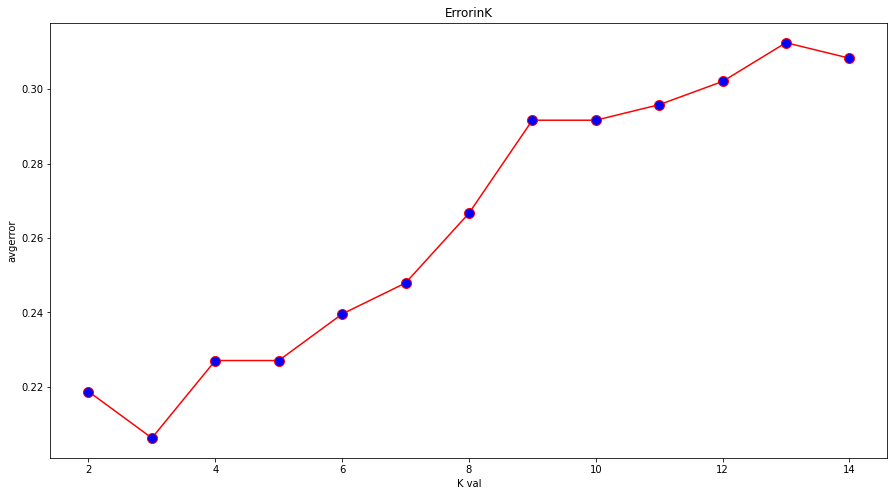

In [64]:
plt.figure(figsize=(15,8))
plt.plot(range(2, 15), error, 
        color='red',marker='o', markerfacecolor='blue', markersize=10 )
plt.title('ErrorinK')
plt.xlabel('K val')
plt.ylabel('avgerror')

In [65]:
neigh = KNeighborsClassifier(n_neighbors=2)

In [66]:
neigh.fit(X_train_it2, y_train_it2)

KNeighborsClassifier(n_neighbors=2)

In [67]:
y_pred_it2 = neigh.predict(X_test_it2)

In [68]:
accuracy_score(y_test_it2, y_pred_it2)

0.78125

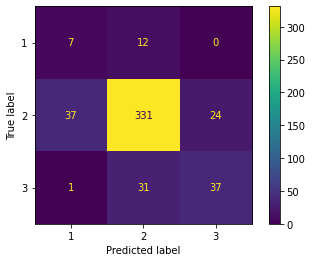

In [69]:
plot_confusion_matrix(neigh,X_test_it2,y_test_it2)

In [71]:
print(classification_report(y_test_it2,y_pred_it2))

              precision    recall  f1-score   support

           1       0.16      0.37      0.22        19
           2       0.89      0.84      0.86       392
           3       0.61      0.54      0.57        69

    accuracy                           0.78       480
   macro avg       0.55      0.58      0.55       480
weighted avg       0.82      0.78      0.80       480

